<a href="https://colab.research.google.com/github/cmoore102589/ai-data-science-portfolio/blob/main/Reinforcement%20Learning/Lab_03_MMoore25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COSC-635: Lab 3

**Matthew Corley Moore**

[PLACEHOLDER_FOR_NOTEBOOK_LINK]

## Getting Started

Follow the instructions below to copy this notebook and to perform some initial setup.

1. Copy this notebook by selecting `File > Save a copy in Drive`.
2. A new window should open for the copied notebook. Move the new notebook to your course folder in Google Drive by selecting `File > Move` and then selecting the desired folder.
3. Update the name of the notebook by removing "Copy of" and replacing "Username" with your actual username.
4. Update the first cell in the notebook by specifying your course number (435 or 635) and by replacing "Student Name" with your actual name.
5. Do not edit the line that says `PLACEHOLDER_FOR_NOTEBOOK_LINK`. This will be used by the [notebook renderer](https://colab.research.google.com/drive/1CJTipys46ldZxJFwnt7XbdjQUfkmoXeU?usp=sharing) tool to insert a link to your Colab notebook.
6. Enable link sharing for your notebook.

## Preparing the Colab Environment

Run the cell below to install gymnasium and to download rltools to the virtual machine.

In [ ]:
%%capture
!pip install gymnasium==0.28.1
!rm rltools -r
!git clone https://github.com/drbeane/rltools.git

The cell below includes the import statements that you will need for this assignmnet. No other import statements should be added anywhere in the notebook.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

import rltools
import rltools.gym as gym
from rltools.utils import evaluate, create_gif
from rltools.dynamic_prog import DPAgent
from rltools.monte_carlo import MCAgent
from rltools.temp_diff import TDAgent
from gymnasium.envs.toy_text.frozen_lake import generate_random_map

## Note on Variable Names

You are free to select the variable names for the objects that you create in this notebook. But please make sure that the variable names you select in each part are distinct from those in other parts. An exception to this rule can be made in instances where a particular variable will be used in a single cell, but no where else in the notebook.

# Part 1 - Frozen Lake

In Part 1 of this assignment, you will apply a variety of control methods to the Frozen Lake environment. In particular, you will apply value iteration, Monte Carlo control, and Q-learning.

## 1.A - Create Environment

In the cell below, we create an 16x16 instance of the Frozen Lake environment. You can rename this environment, if you wish. Otherwise, run this cell as-is.

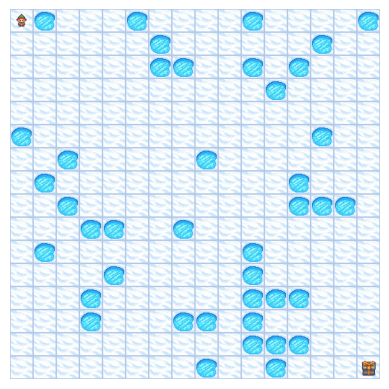

In [ ]:
env1 = gym.make(
    'FrozenLake-v1',
    prob = 0.9,
    rew_struct = [-0.2, -10, 100],
    desc = generate_random_map(size=16, p=0.8, seed=8),
    render_mode = 'rgb_array'
)

state, info = env1.reset()
plt.imshow(env1.render())
plt.axis('off')
plt.show()

## 1.B - Value Iteration

Complete the following steps in the cell below:

1. Create an instance of `DPAgent` for the environment from 1A. Set a discount rate of 1.0 and a seed of 1.
2. Use the agent to perform value iteration.
3. Use `evaluate()` to evaluate the optimal policy. Use 1000 episodes, `gamma=1.0`, `seed=1`, and `check_success=True`.

In [ ]:
dpAgent1 = DPAgent(env1, gamma=1.0, seed=1)
dpAgent1.value_iteration()
evaluate(env=env1, agent=dpAgent1, episodes=1000, gamma=1.0, seed=1, check_success=True)

Value iteration required 328 steps to converge.
Mean Return:    83.519
StdDev Return:  25.3604
Mean Length:    51.505
StdDev Length:  19.0058
Success Rate:   0.942


{'mean_return': 83.51899999999985,
 'stdev_return': 25.360355656023405,
 'mean_length': 51.505,
 'stdev_length': 19.005787934205728,
 'sr': 0.942,
 'avg_len_s': 52.28662420382165,
 'avg_len_f': 38.810344827586206}

## 1.C - Monte Carlo Control

Create an instance of `MCAgent` for `env1` with `gamma=1.0`. Then apply Monte Carlo control. Guidelines for the parameter selection are provided below.
* Use 20,000 to 50,000 episodes. The fewer required to get the desired performance, the better.
* Set `max_steps` to 500.
* Experiment with `alpha`, `alpha_decay`, `epsilon`, and `epsilon_decay`.
* Set `exploring_starts=True`.
* Set a seed value for the sake of reproducability.
* Display an update every 1000 episodes.
* Use 1000 episodes for evaluation.
* Set `check_success=True`.

Your goal is to find a policy with a success rate of at least 0.8, but you are encouraged to try to do even better, if possible. Note that the optimal policy found by value iteration had a success rate of around 0.94.

In [ ]:
mcAgent1 = MCAgent(env=env1, gamma=1.0)
mcAgent1.control(
    episodes = 35000,
    max_steps = 500,
    alpha = .25,
    alpha_decay = 1e-4,
    epsilon = 1.0,
    epsilon_decay = 1e-4,
    exploring_starts = True,
    updates = 1000,
    eval_eps = 100,
    check_success = True,
    seed = 42
)

Episode   Mean[Return]  SD[Return]  Mean[Length]  SD[Length]  Success_Rate
--------------------------------------------------------------------------
1000          -13.7980      3.6268       19.9900     18.1342        0.0000  (Saving new best model)
2000          -10.0440      0.1186        1.2200      0.5930        0.0000  (Saving new best model)
3000          -10.0300      0.0954        1.1500      0.4770        0.0000  (Saving new best model)
4000          -10.0260      0.0923        1.1300      0.4616        0.0000  (Saving new best model)
5000          -10.0440      0.1485        1.2200      0.7427        0.0000  
6000          -10.0520      0.1315        1.2600      0.6576        0.0000  
7000          -10.0320      0.1085        1.1600      0.5426        0.0000  
8000          -10.0420      0.1365        1.2100      0.6826        0.0000  
9000          -10.0460      0.1292        1.2300      0.6458        0.0000  
10000         -10.0460      0.1381        1.2300      0.6907     

## 1.D - Evaluating Monte Carlo Policy

Use `evaluate()` to evaluate the policy found by the Monte Carlo agent. Use 1000 episodes, `gamma=1.0`, `seed=1`, and `check_success=True`.

**If your agent does not have a success rate of at least 0.8, then you should adjust the parameters from 1.E and retrain the agent.**


In [ ]:
evaluate(env=env1, agent=mcAgent1, episodes=1000, gamma=1.0, seed=1, check_success=True)

Mean Return:    75.7172
StdDev Return:  38.6613
Mean Length:    34.414
StdDev Length:  10.2548
Success Rate:   0.84


{'mean_return': 75.71719999999992,
 'stdev_return': 38.66129672113956,
 'mean_length': 34.414,
 'stdev_length': 10.254784444345965,
 'sr': 0.84,
 'avg_len_s': 38.08690476190476,
 'avg_len_f': 15.13125}

## 1.E - Q-Learning

Create an instance of `TDAgent` for the environment from 1.A, setting `gamma=1.0`. Then apply Q-learning. Use the same guidelines for parameter selection as those described for Monte Carlo control in Step 1.C. You do not need to use the exact same parameters, however.

Your goal is to find a policy with a success rate of at least 0.9, but you are encouraged to try to do even better, if possible. Note that the optimal policy found by value iteration had a success rate of around 0.94

In [ ]:
tdAgent1 = TDAgent(env=env1, gamma=1.0)
tdAgent1.q_learning(
    episodes = 20000,
    max_steps = 500,
    alpha = 0.1,
    alpha_decay = 1e-6,
    epsilon = 0.5,
    epsilon_decay = 1e-6,
    exploring_starts = True,
    updates = 1000,
    eval_eps = 100,
    check_success = True,
    seed = 42
)

Episode   Mean[Return]  SD[Return]  Mean[Length]  SD[Length]  Success_Rate
--------------------------------------------------------------------------
1000          -14.4660      4.7114       23.3300     23.5572        0.0000  (Saving new best model)
2000          -20.3560     45.2663      143.7200    140.9298        0.1600  
3000          -46.4540     30.3566      192.2000    146.2362        0.0100  
4000          -61.0860     63.7690      445.7100    109.0560        0.2800  
5000           76.6540     24.7091       84.7300     61.0632        0.9400  (Saving new best model)
6000          -58.6300     67.8040      427.9300    134.1944        0.2700  
7000           80.1400     24.1276       67.3000     42.0636        0.9400  (Saving new best model)
8000           71.2860     43.0388       29.0700     10.5349        0.7900  
9000          -37.6300     69.4519      374.1200    171.8242        0.3800  
10000          76.7660     29.6264       67.6700     45.5487        0.9100  
11000      

## 1.F - Evaluating Q-Learning Policy

Use `evaluate()` to evaluate the policy found by the TD agent. Use 1000 episodes, `gamma=1.0`, `seed=1`, and `check_success=True`.

**If your agent does not have a success rate of at least 0.9, then you should adjust the parameters from 1.E and retrain the agent.**

In [ ]:
evaluate(env=env1, agent=tdAgent1, episodes=1000, gamma=1.0, seed=1, check_success=True)

Mean Return:    79.0782
StdDev Return:  24.4778
Mean Length:    71.509
StdDev Length:  46.172
Success Rate:   0.938


{'mean_return': 79.0781999999998,
 'stdev_return': 24.47784804185204,
 'mean_length': 71.509,
 'stdev_length': 46.17196031142711,
 'sr': 0.938,
 'avg_len_s': 76.10767590618337,
 'avg_len_f': 1.935483870967742}

# Part 2 - Cart Pole Environment

In Part 2, you will apply Monte Carlo control and Q-Learning to the Cart Pole environment. This environment has a continuous state space, so we will need to discretize the state space to use these algorithms. Note that we do not have direct access to the MDP for the discretized version of this environment, so we cannot apply value iteration to find the optimal policy.

## 2.A - Create Environment

The cell below creates an instance of the Cart Pole environment in which the state coordinates are discretized by splitting them each across 25 bins. You can rename this environment, if you wish. Otherwise, run this cell as-is.

In [ ]:
env2 = gym.make(
    "CartPole-v1", num_bins=25,
    render_mode='rgb_array',
)

## 2.B - Monte Carlo Control

Create an instance of `MCAgent` for the environment from 2.A with `gamma=1.0`. Then apply Monte Carlo control. Guidelines for the parameter selection are provided below.
* Use 20,000 to 50,000 episodes. The fewer required to get the desired performance, the better.
* Set `max_steps` to 1000.
* Experiment with `alpha`, `alpha_decay`, `epsilon`, and `epsilon_decay`.
* Set `exploring_starts=False`.
* Set a seed value for the sake of reproducability.
* Display an update every 1000 episodes.
* Use 100 episodes for evaluation.
* Set `check_success=False`.

Your goal is to find a policy that satisfies the following two criteria:
* `Mean[Return] > 500`
* `Mean[Return] - SD[Return] > 250`

**Note: It is possible to meet (and considerably exceed) this goal in 20,000 episodes.**

In [ ]:
mcAgent2 = MCAgent(env=env2, gamma=1.0)

mcAgent2.control(
    episodes = 20000,
    max_steps = 1000,
    alpha = 0.2,
    alpha_decay = 1e-8,
    epsilon = .2,
    epsilon_decay = 1e-8,
    exploring_starts = False,
    updates = 1000,
    eval_eps = 100,
    check_success = False,
)

Episode   Mean[Return]  SD[Return]  Mean[Length]  SD[Length]
------------------------------------------------------------
1000          242.5800    245.5682      243.5000    245.3214  (Saving new best model)
2000          207.1200    116.9242      208.1200    116.9242  (Saving new best model)
3000          170.5600     54.3248      171.5600     54.3248  (Saving new best model)
4000          157.7600     48.3965      158.7600     48.3965  
5000          284.9300    183.0493      285.9000    182.9321  
6000          298.6600    187.6919      299.6400    187.6172  
7000          228.5900    131.8073      229.5900    131.8073  
8000          228.8500    111.5266      229.8500    111.5266  (Saving new best model)
9000          316.8000    186.1272      317.7900    186.0905  (Saving new best model)
10000         351.3300    220.2690      352.2800    220.1218  (Saving new best model)
11000         396.1100    235.9022      397.0600    235.7743  (Saving new best model)
12000         321.8900  

## 2.C - Evaluating Monte Carlo Policy


Use `evaluate()` to evaluate the policy found by the Monte Carlo agent. Use 500 episodes, `gamma=1.0`, `seed=1`, `max_steps=1000`, and `check_success=False`.



In [ ]:
evaluate(env=env2, agent=mcAgent2, episodes=500, gamma=1.0, seed=1, max_steps=1000, check_success=False)

Mean Return:    598.938
StdDev Return:  294.6424
Mean Length:    599.712
StdDev Length:  294.3349


{'mean_return': 598.938,
 'stdev_return': 294.6423970782209,
 'mean_length': 599.712,
 'stdev_length': 294.3349062819427}

## 2.D - Animate an Episode using MC Policy

Use the `create_gif()` function to animate an episode following the policy found by the MC Agent. Store the gif in a folder named `gifs` and name the gif `cartpole_01`. Leave `max_steps` at the default value of 1000. Set a seed for the episode. Adjust the seed until you find an episode with a length of at least 500 steps.

527 steps completed.
Cumulative reward: 526.0


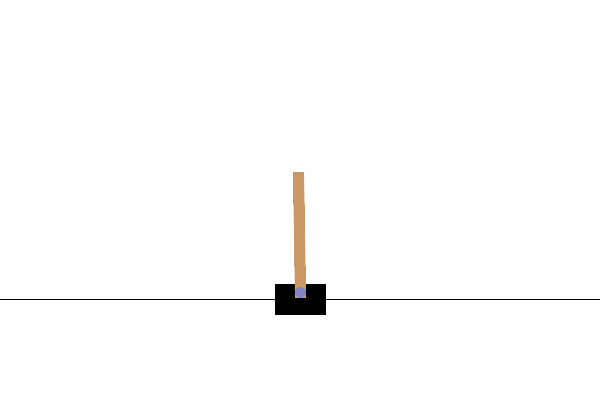

In [ ]:
create_gif(env=env2, agent = mcAgent2, folder= 'gifs', filename= 'cartpole_01', seed = 6)

## 2.E - Q-Learning

Create an instance of `TDAgent` for the environment from 2.A, setting `gamma=1.0`. Use the agent to apply Q-learning. Use the same guidelines for parameter selection as those described for Monte Carlo control in Step 2.B. You do not need to use the exact same parameters, however.

Your goal is to find a policy that satisfies the following criteria:
* `Mean[Return] - SD[Return] > 950`

**Note: It is possible to meet this goal in 20,000 episodes. Perfect performance can be obtained in as few as 13,000 episodes with the right parameters.**

In [ ]:
tdAgent2 = TDAgent(env=env2, gamma=1.0)

tdAgent2.q_learning(
    episodes = 20000,
    max_steps = 1000,
    alpha = 0.25,
    alpha_decay = 1e-5,
    epsilon = 1.0,
    epsilon_decay = 5e-4,
    exploring_starts = False,
    updates = 1000,
    eval_eps = 100,
    check_success = False,
    seed = 42
)

Episode   Mean[Return]  SD[Return]  Mean[Length]  SD[Length]
------------------------------------------------------------
1000          212.7400    213.2480      213.7000    213.1004  (Saving new best model)
2000          127.0800     31.7398      128.0800     31.7398  (Saving new best model)
3000          306.4100    238.4106      307.3400    238.2070  
4000          208.0100     36.4597      209.0100     36.4597  (Saving new best model)
5000          217.2200     57.6374      218.2200     57.6374  
6000          321.3300    152.0445      322.3000    151.9106  
7000          263.1700     54.4428      264.1700     54.4428  (Saving new best model)
8000          768.1200    229.2223      768.8000    228.8988  (Saving new best model)
9000          298.5600    198.1691      299.5200    198.0275  
10000        1000.0000      0.0000     1000.0000      0.0000  (Saving new best model)
11000         970.6600    123.6367      970.7200    123.4136  
12000        1000.0000      0.0000     1000.000

## 2.F - Evaluating Q-Learning Policy

Use `evaluate()` to evaluate the policy found by the TD agent. Use 500 episodes, `gamma=1.0`, `seed=1`, `max_steps=1000`, and `check_success=False`.



In [ ]:
evaluate(env=env2, agent=tdAgent2, episodes=500, gamma=1.0, seed=1, max_steps=1000, check_success=False)

Mean Return:    990.616
StdDev Return:  85.3553
Mean Length:    990.63
StdDev Length:  85.2469


{'mean_return': 990.616,
 'stdev_return': 85.35526078690171,
 'mean_length': 990.63,
 'stdev_length': 85.2468714968473}

## 2.G - Animate an Episode using TD Policy

Use the `create_gif()` function to animate an episode following the policy found by the TD Agent. Store the gif in a folder named `gifs` and name the gif `cartpole_02`. Leave `max_steps` at the default value of 1000. Set a seed for the episode. Adjust the seed until you find an episode with a length of at least 950 steps.

1000 steps completed.
Cumulative reward: 1000.0


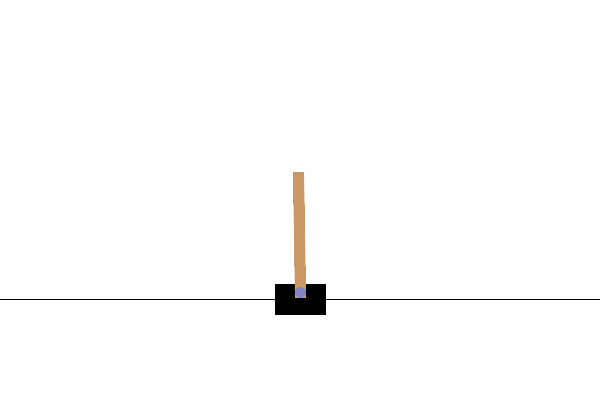

In [ ]:
create_gif(env=env2, agent=tdAgent2, folder= 'gifs', filename= 'cartpole_02', seed = 6)

# Submission Instructions

1. Perform a Restart and Run All by clicking **Runtime > Restart session and run all**.
2. Copy the link to your notebook by clicking **Share > Copy Link**.
3. Paste the copied link into the `notebook_url` field in the [Notebook Renderer](https://colab.research.google.com/drive/1CJTipys46ldZxJFwnt7XbdjQUfkmoXeU?usp=sharing) tool and then execute the cell to render the notebook.
4. The Notebook Renderer will open up a save file dialog. Save the resulting HTML file yo your local machine.
5. Submit the HTML file to Canvas.
